In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import itertools

In [2]:
data= pd.read_csv('../input/marketing-data-for-a-supermarket-in-united-states/supermarket_marketing/Market_Basket_Optimisation.csv')
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Each row of data(including index row)are items taken in a basket
## Forming 2D list of all rows 

In [3]:
with open('../input/marketing-data-for-a-supermarket-in-united-states/supermarket_marketing/Market_Basket_Optimisation.csv', 'r') as op:
    baskets_entries = [l.strip().split(',') for l in op.readlines()]

In [4]:
# Viewing 1st and 2nd entries 
display(baskets_entries[0])
display(baskets_entries[1])

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

['burgers', 'meatballs', 'eggs']

## Knowing the maximum and minimum number of products that coustomers buy at a time

In [5]:
buy_num= []
for i in range(len(baskets_entries)):
    k= len(baskets_entries[i])
    buy_num.append(k)
len(buy_num)

7501

In [6]:
print("Maximum number of products that people buy at a time: " + str(max(buy_num)))
# print('\n')
print("Minimum number of products that people buy at a time: " + str(min(buy_num)))

Maximum number of products that people buy at a time: 20
Minimum number of products that people buy at a time: 1


# Number of times a particular number was sold

In [7]:
# The product which are bought most frequently
item_freq= Counter([i for b in baskets_entries for i in b]).most_common(20)
item_freq

[('mineral water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french fries', 1282),
 ('chocolate', 1230),
 ('green tea', 991),
 ('milk', 972),
 ('ground beef', 737),
 ('frozen vegetables', 715),
 ('pancakes', 713),
 ('burgers', 654),
 ('cake', 608),
 ('cookies', 603),
 ('escalope', 595),
 ('low fat yogurt', 574),
 ('shrimp', 536),
 ('tomatoes', 513),
 ('olive oil', 494),
 ('frozen smoothie', 475),
 ('turkey', 469)]

Text(0, 0.5, 'Product name')

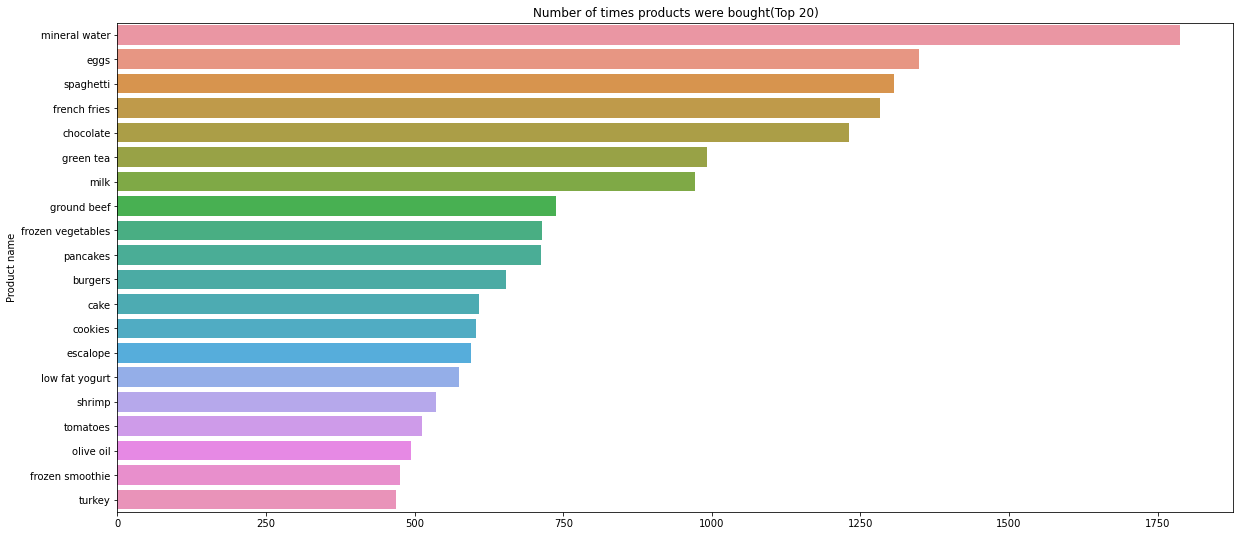

In [8]:
item= []
freq= []
for i in range(len(item_freq)):
    item.append(item_freq[i][0])
    freq.append(item_freq[i][1])
    
# Set the width and height of the figure
plt.figure(figsize=(20,9))

# Add title
plt.title("Number of times products were bought(Top 20)")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=freq, y=item)

# Add label for vertical axis
plt.ylabel("Product name")

# Products which were bought together

In [9]:
# Products that are often bought together
item_combination_freq= Counter(['| '.join(c) for b in baskets_entries for c in itertools.combinations(b, 2)]).most_common(30)
item_combination_freq

[('spaghetti| mineral water', 448),
 ('mineral water| eggs', 382),
 ('mineral water| milk', 360),
 ('mineral water| chocolate', 314),
 ('ground beef| mineral water', 307),
 ('ground beef| spaghetti', 294),
 ('spaghetti| eggs', 274),
 ('eggs| french fries', 273),
 ('frozen vegetables| mineral water', 268),
 ('spaghetti| milk', 266),
 ('chocolate| french fries', 258),
 ('mineral water| pancakes', 253),
 ('mineral water| french fries', 252),
 ('mineral water| green tea', 231),
 ('milk| eggs', 231),
 ('burgers| eggs', 216),
 ('frozen vegetables| spaghetti', 209),
 ('mineral water| olive oil', 207),
 ('spaghetti| chocolate', 207),
 ('spaghetti| french fries', 207),
 ('mineral water| cake', 206),
 ('spaghetti| green tea', 199),
 ('eggs| green tea', 191),
 ('spaghetti| pancakes', 189),
 ('burgers| mineral water', 183),
 ('tomatoes| mineral water', 183),
 ('milk| french fries', 178),
 ('mineral water| low fat yogurt', 178),
 ('shrimp| mineral water', 177),
 ('frozen vegetables| milk', 177)]

Text(0, 0.5, 'Product name')

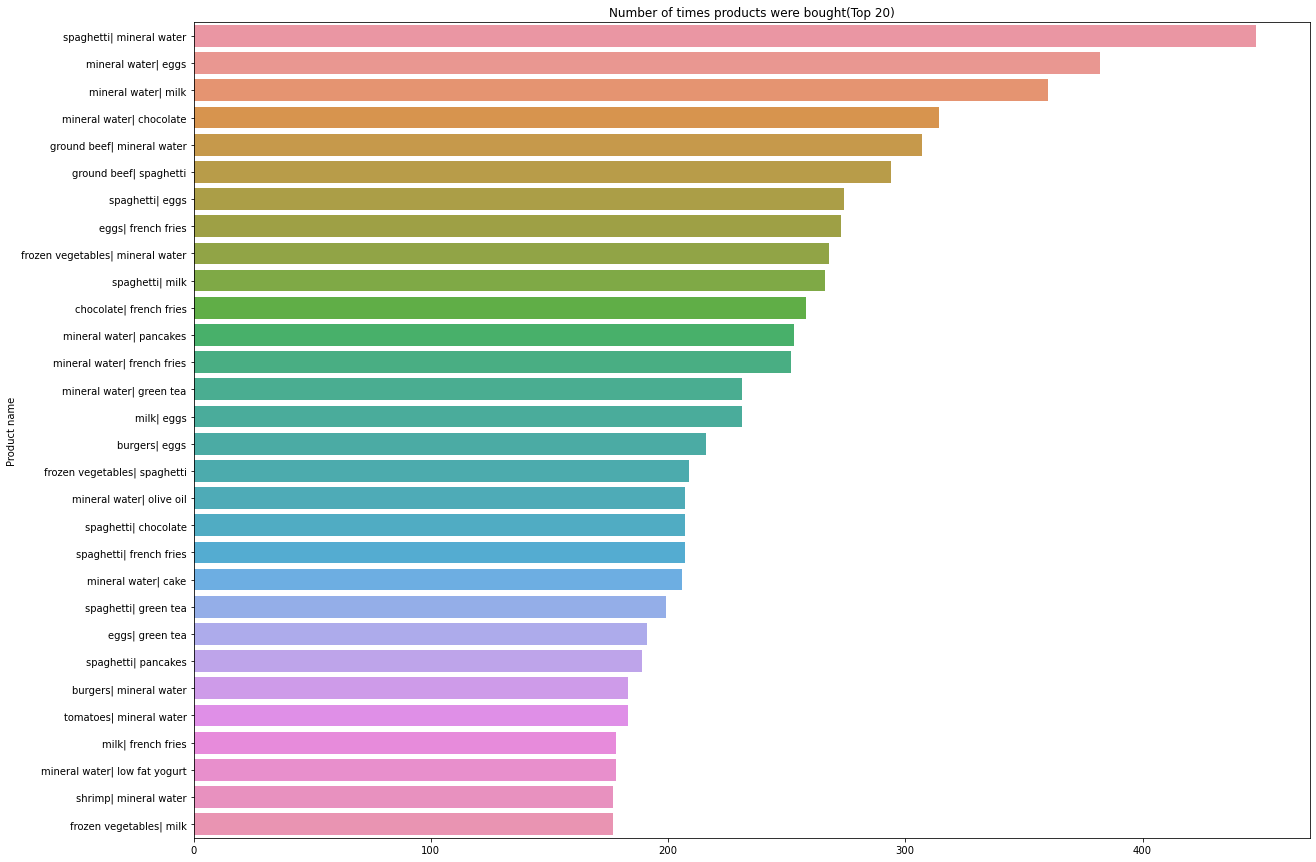

In [10]:
item_combination= []
freq_combination= []
for i in range(len(item_combination_freq)):
    item_combination.append(item_combination_freq[i][0])
    freq_combination.append(item_combination_freq[i][1])
    
# Set the width and height of the figure
plt.figure(figsize=(20,15))

# Add title
plt.title("Number of times products were bought(Top 20)")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=freq_combination, y=item_combination)

# Add label for vertical axis
plt.ylabel("Product name")

# Average number of products bought by single coustomer

In [11]:
all_items= []
for i in range(len(baskets_entries)):
    for j in range(len(baskets_entries[i])):
        item= baskets_entries[i][j]
        all_items.append(item)
all_items

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil',
 'burgers',
 'meatballs',
 'eggs',
 'chutney',
 'turkey',
 'avocado',
 'mineral water',
 'milk',
 'energy bar',
 'whole wheat rice',
 'green tea',
 'low fat yogurt',
 'whole wheat pasta',
 'french fries',
 'soup',
 'light cream',
 'shallot',
 'frozen vegetables',
 'spaghetti',
 'green tea',
 'french fries',
 'eggs',
 'pet food',
 'cookies',
 'turkey',
 'burgers',
 'mineral water',
 'eggs',
 'cooking oil',
 'spaghetti',
 'champagne',
 'cookies',
 'mineral water',
 'salmon',
 'mineral water',
 'shrimp',
 'chocolate',
 'chicken',
 'honey',
 'oil',
 'cooking oil',
 'low fat yogurt',
 'turkey',
 'eggs',
 'turkey',
 'fresh tuna',
 'tomatoes',
 'spaghetti',
 'mineral water',
 'black tea',
 'sal

In [12]:
print("Average number of products bought by single coustomer= " + str(int(len(all_items)/len(data))))

Average number of products bought by single coustomer= 3
